In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

In [2]:
para= {
    "ip_port_file":r"H:\test_data\input\meb\ip_port.txt",
    "local_binary_dir":"O:/data/mdfs",
    "local_sta_dir": "O:/data/sta",
    "local_grid_dir":"O:/data/grid",
    "max_save_day":7,
    }
grid0 = meb.grid([70,140,1],[15,55,1])

In [3]:
dir_ob_tmin = "SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/YYYYMMDDHH0000.000"
now = datetime.datetime.now()
today = datetime.datetime(now.year,now.month,now.day,8,0)
station_alt = meb.read_station(meb.station_国家站)
station = station_alt.copy()
station["data0"] = meb.IV
station = meb.in_grid_xy(station,grid0)
id_dict = {"北京":54511,"哈尔滨":50953, "武汉":57494,"广州":59287}
id_list = []
for key in id_dict.keys():
    id_list.append(id_dict[key])
station_city = meb.in_id_list(station,id_list)
veri_day_count = 7
week_ago = today - datetime.timedelta(days = veri_day_count)
tweek_ago = week_ago -  datetime.timedelta(days = veri_day_count)

In [4]:
#读取观测的24小时最高温
dir_ob_tmax = "SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/YYYYMMDDHH0000.000"
ob_tmax_list = []
time2 = week_ago
while time2 <= now:
    sta_max = None
    for i in range(-23,1,1):
        time_ob = time2 + datetime.timedelta(hours = i)
        path = meb.tool.path_tools.get_path(dir_ob_tmax,time_ob)
        sta = mpd.application.read_stadata(para,path,station = station)
        sta_max = meb.fun.computing.max_on_id(sta_max,sta)
    if sta_max is not None:
        meb.set_stadata_coords(sta_max,time = time2,dtime = 0,level = 0)
        meb.set_stadata_names(sta_max,["ob"])
        ob_tmax_list.append(sta_max)
    time2 = time2 + datetime.timedelta(hours = 12)
ob_tmax_all = pd.concat(ob_tmax_list,axis = 0)

#读取观测的24小时最低温
dir_ob_tmin = "SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/YYYYMMDDHH0000.000"
ob_tmin_list = []
time2 = week_ago
while time2 <= now:
    sta_min = None
    for i in range(-23,1,1):
        time_ob = time2 + datetime.timedelta(hours = i)
        path = meb.tool.path_tools.get_path(dir_ob_tmin,time_ob)
        sta = mpd.application.read_stadata(para,path,station = station)
        sta_min = meb.fun.computing.min_on_id(sta_min,sta)
    if sta_min is not None:
        meb.set_stadata_coords(sta_min,time = time2,dtime = 0,level = 0)
        meb.set_stadata_names(sta_min,["ob"])
        ob_tmin_list.append(sta_min)
    time2 = time2 + datetime.timedelta(hours = 12)
ob_tmin_all = pd.concat(ob_tmin_list,axis = 0)


#读取ECMWF最低温
dir_scmoc = r"ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\YYMMDDHH.TTT"
ec_tmin_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,12):
        sta_min = None
        for i in range(-18,1,6):
            path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh+i)
            sta = mpd.application.read_stadata_from_griddata(para,path,station)
            sta_min = meb.fun.computing.min_on_id(sta_min,sta)
        if sta_min is not None:
            meb.set_stadata_coords(sta_min,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_max,["ecmwf"])
            ec_tmin_list.append(sta_min)
    time2 = time2 + datetime.timedelta(hours = 12)
ec_tmin_all = pd.concat(ec_tmin_list,axis = 0)

#读取ECMWF最高温
dir_scmoc = r"ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\YYMMDDHH.TTT"
ec_tmax_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,12):
        sta_max = None
        for i in range(-18,1,6):
            path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh+i)
            sta = mpd.application.read_stadata_from_griddata(para,path,station)
            sta_max = meb.fun.computing.max_on_id(sta_max,sta)
        if sta_max is not None:
            meb.set_stadata_coords(sta_max,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_max,["ecmwf"])
            ec_tmax_list.append(sta_max)
    time2 = time2 + datetime.timedelta(hours = 12)
ec_tmax_all = pd.concat(ec_tmax_list,axis = 0)

#读取GRAPES_GFS最高温
dir_scmoc = r"GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\YYMMDDHH.TTT"
grapes_tmax_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,12):
        sta_max = None
        for i in range(-21,1,3):
            path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh+i)
            sta = mpd.application.read_stadata_from_griddata(para,path,station)
            sta_max = meb.fun.computing.max_on_id(sta_max,sta)
        if sta_max is not None:
            meb.set_stadata_coords(sta_max,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_max,["grapes"])
            grapes_tmax_list.append(sta_max)
    time2 = time2 + datetime.timedelta(hours = 12)
grapes_tmax_all = pd.concat(grapes_tmax_list,axis = 0)

#读取GRAPES_GFS最低温
dir_scmoc = r"GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\YYMMDDHH.TTT"
grapes_tmin_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,12):
        sta_min = None
        for i in range(-21,1,3):
            path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh+i)
            sta = mpd.application.read_stadata_from_griddata(para,path,station)
            sta_min = meb.fun.computing.min_on_id(sta_min,sta)
        if sta_min is not None:
            meb.set_stadata_coords(sta_min,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_min,["grapes"])
            grapes_tmin_list.append(sta_min)
    time2 = time2 + datetime.timedelta(hours = 12)
grapes_tmin_all = pd.concat(grapes_tmin_list,axis = 0)


#读取SCMOC最高温
dir_scmoc = r"NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\YYMMDDHH.TTT"
scmoc_tmax_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,24):
        path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh)
        sta_max = mpd.application.read_stadata_from_griddata(para,path,station)
        if sta_max is not None:
            meb.set_stadata_coords(sta_max,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_max,["scmoc"])
            scmoc_tmax_list.append(sta_max)
    time2 = time2 + datetime.timedelta(hours = 12)
scmoc_tmax_all = pd.concat(scmoc_tmax_list,axis = 0)

#读取SCMOC最低温
dir_scmoc = r"NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\YYMMDDHH.TTT"
scmoc_tmin_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,24):
        path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh)
        sta_min = mpd.application.read_stadata_from_griddata(para,path,station)
        if sta_min is not None:
            meb.set_stadata_coords(sta_min,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_min,["scmoc"])
            scmoc_tmin_list.append(sta_min)
    time2 = time2 + datetime.timedelta(hours = 12)
scmoc_tmin_all = pd.concat(scmoc_tmin_list,axis = 0)


#数据合并qc
tmax_all = meb.combine_on_obTime_id(ob_tmax_all,[scmoc_tmax_all,ec_tmax_all,grapes_tmax_all])
tmax_all = meb.between_value_range(tmax_all,-100,100)
tmin_all = meb.combine_on_obTime_id(ob_tmin_all,[scmoc_tmin_all,ec_tmin_all,grapes_tmin_all])
tmin_all = meb.between_value_range(tmin_all,-100,100)

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402090000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402100000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402110000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402120000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402130000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402140000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402150000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402160000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402180000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402190000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200402/20200402200000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200404/20200404170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200404/20200404180000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200404/20200404190000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200404/20200404200000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200404/20200404210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200404/20200404220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200404/20200404230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200405/20200405000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200405/20200405010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200405/20200405020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200405/20200405030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200405/20200405040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407060000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407070000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200406/20200406210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200406/20200406220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200406/20200406230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200407/20200407000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200408/20200408210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200408/20200408220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200408/20200408230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409060000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409070000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200409/20200409080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200403/20200403170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200403/20200403180000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200403/20200403190000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200403/20200403200000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200403/20200403210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200403/20200403220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200403/20200403230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200404/20200404000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200404/20200404010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200404/20200404020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200404/20200404030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200404/20200404040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406060000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406070000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200405/20200405210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200405/20200405220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200405/20200405230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200406/20200406000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200407/20200407210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200407/20200407220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200407/20200407230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408060000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408070000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200408/20200408080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/2

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032708.054.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032808.048.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.138.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.144.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032908.006.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032908.012.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032908.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032908.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032908.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032908.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032908.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032908.036.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.138.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.144.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033008.006.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033008.012.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033008.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033008.024.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.138.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.090.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.120.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.084.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.078.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.084.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.090.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.090.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.102.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.072.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.072.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.078.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.084.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.078.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.084.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.090.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.096.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.072.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.072.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.078.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040320.084.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040420.072.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040520.060.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.012.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040620.042.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.138.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.144.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040720.006.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040720.012.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040720.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040720.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040720.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040720.024.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.138.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.144.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040820.006.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.132.nc
O:/data/gr

ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.102
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.108
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.102
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.108
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.114
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.120
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.114
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.120
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.126
unpack requires a buffer of 28 bytes
E

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200327/20032720.108.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200328/20032820.090.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200329/20032920.084.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200330/20033020.066.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200331/20033120.048.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040108.144.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.006.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.012.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200401/20040120.030.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040208.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040208.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040208.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040208.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040208.138.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040208.144.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.006.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.012.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200402/20040220.024.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.120.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.120.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200403/20040308.138.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.120.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200404/20040408.120.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200405/20040508.102.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200406/20040608.096.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200407/20040708.078.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200408/20040808.060.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040908.042.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040920.138.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200409/20040920.144.nc
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.006
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.012
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.018
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.024
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.018
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.024
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20041008.030
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERAT

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.120.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.120.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032820.123
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032820.129
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032820.123
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032820.129
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.13

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.042.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.048.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.042.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.048.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.054.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.054.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.120.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.120.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040208.123
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040208.129
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040208.123
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040208.129
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040208.135
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.138.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040208.141
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.144.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2

GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040220.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.144.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.003.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.006.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.009.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.012.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.042.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.048.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.048.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.042.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.048.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.054.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.054.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.120.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.120.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.120.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040720.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040720.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040720.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIM

GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040808.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040808.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040808.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040808.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.138.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040808.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.144.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.003.nc
O:/da

GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040820.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.144.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.003.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.006.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.009.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.012.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.030
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.033
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.036
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.027
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.030
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.033
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.036
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.039
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.042
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.045
unpack requires a buffer of 28

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032820.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032908.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.120.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.120.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032920.123
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200329/20032920.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032920.129
O:/data/grid/GRAPES_GFS\MINIMU

GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20033008.129
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20033008.123
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20033008.129
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20033008.135
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.138.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20033008.141
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033008.144.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.003.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.006.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200330/20033020.009.nc
O:/data/grid/GRAPES_

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.009.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.012.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033108.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200331/20033120.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040108.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200401/20040120.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040208.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.120.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.120.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040308.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.120.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040320.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040320.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040320.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040320.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040320.135
unpack requires a buffer of 28 bytes
O:/da

GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040408.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040408.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.138.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040408.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.144.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.003.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.006.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.009.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.012.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.015.nc
O:/data/grid/GRAPES_GFS\MINIM

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.009.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.012.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040520.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040608.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200406/20040620.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040708.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200407/20040720.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040808.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200408/20040820.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.120.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040908.120.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040908.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.120.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040920.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040920.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040920.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040920.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200409/20040920.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20040920.135
unpack requires a buffer of 28 bytes
O:/da

GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.114
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.117
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.120
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.123
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.126
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.129
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.132
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.123
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.126
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20041008.129
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE

O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.072.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.096.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.120.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200402/20040220.144.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.024.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.048.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.072.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.096.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.120.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040308.144.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200403/20040320.024.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.096.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.120.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032708.144.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.024.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.048.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.072.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.096.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.120.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200327/20032720.144.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.024.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200328/20032808.048.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.120.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040408.144.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.024.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.048.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.072.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.096.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.120.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200404/20040420.144.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.024.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.048.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200405/20040508.072.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

In [5]:
meb.set_stadata_names(tmax_all,["ob","scmoc","ecmwf","grapes_gfs"])
meb.set_stadata_names(tmin_all,["ob","scmoc","ecmwf","grapes_gfs"])

误差绝对值前1的站点：
id:56097   lon:104.25  lat:33.27 value:9.476902


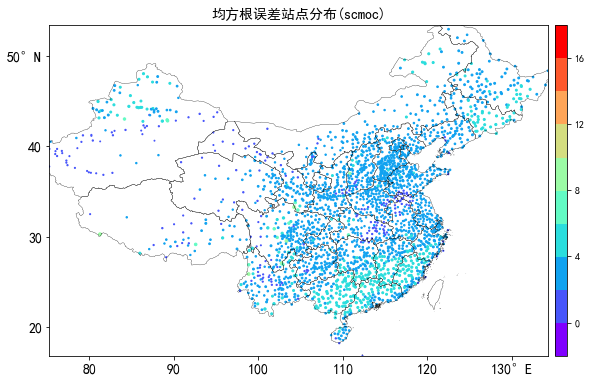

误差绝对值前1的站点：
id:55437   lon:81.25  lat:30.28 value:15.189462


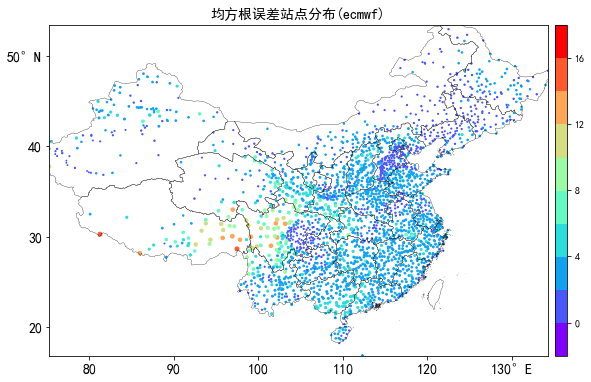

误差绝对值前1的站点：
id:51572   lon:89.25  lat:42.83 value:17.746733


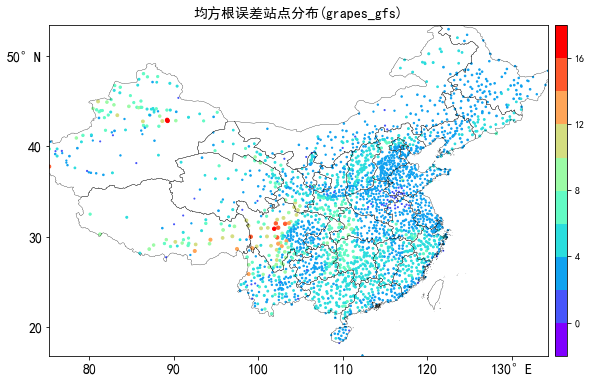

In [6]:
mpd.rmse_scatter(tmax_all)

误差绝对值前1的站点：
id:56385   lon:103.33  lat:29.52 value:9.663928


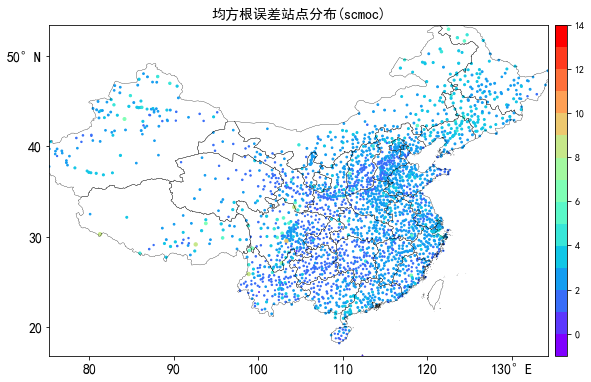

误差绝对值前1的站点：
id:56228   lon:96.92  lat:30.05 value:13.680127


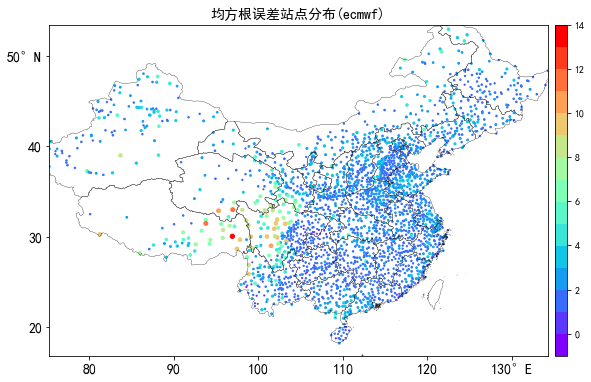

误差绝对值前1的站点：
id:56263   lon:101.88  lat:30.88 value:13.984759


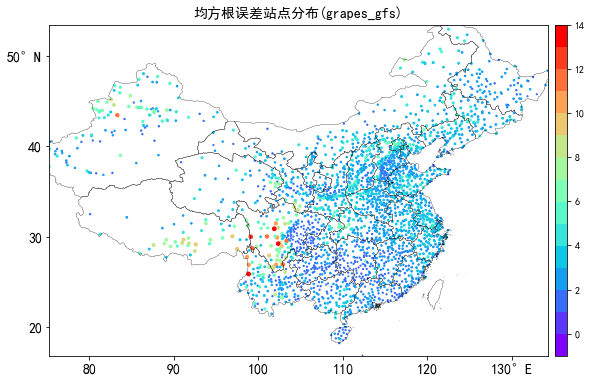

In [7]:
mpd.rmse_scatter(tmin_all)

In [8]:
tmax_on_ob = meb.between_ob_time_range(tmax_all,week_ago,now)
tmax_on_fo = meb.between_time_range(tmax_on_ob,tweek_ago,week_ago)
result1 = mpd.score(tmax_on_fo,mem.rmse,g = "dtime")

In [9]:
tmin_on_ob = meb.between_ob_time_range(tmin_all,week_ago,now)
tmin_on_fo = meb.between_time_range(tmin_on_ob,tweek_ago,week_ago)
result2 = mpd.score(tmin_on_fo,mem.rmse,g = "dtime")

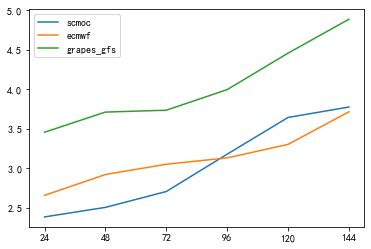

In [10]:
data_names = meb.get_stadata_names(tmax_on_ob)
for i in range(len(data_names)-1):
    plt.plot(result1[1],result1[0][:,i],label = data_names[i+1])
plt.xticks(result1[1])
plt.legend()

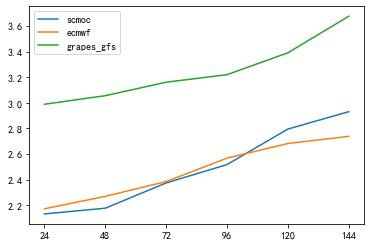

In [11]:
data_names = meb.get_stadata_names(tmax_on_ob)
for i in range(len(data_names)-1):
    plt.plot(result2[1],result2[0][:,i],label = data_names[i+1])
plt.xticks(result2[1])
plt.legend()

误差绝对值前1的站点：
id:56097   lon:104.25  lat:33.27 value:-9.009106


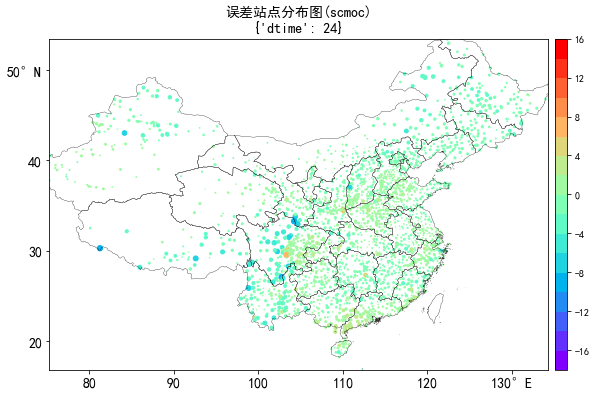

误差绝对值前1的站点：
id:55437   lon:81.25  lat:30.28 value:-14.993864


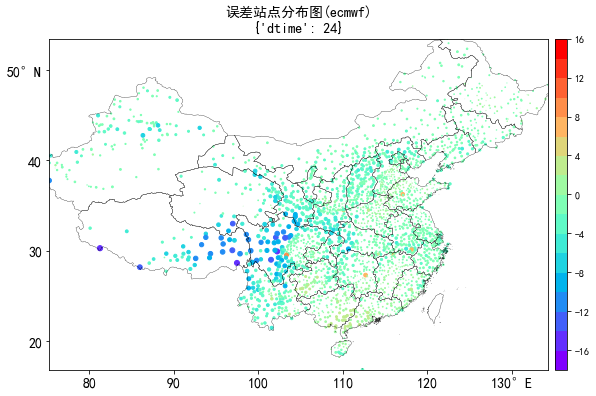

误差绝对值前1的站点：
id:51572   lon:89.25  lat:42.83 value:-16.72268


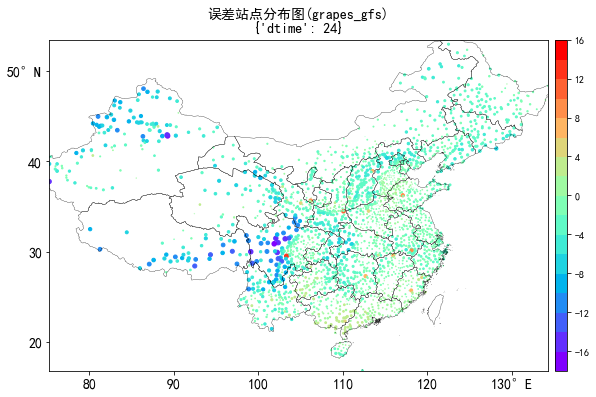

In [12]:
mpd.me_scatter(tmax_all,s = {"dtime":24})

误差绝对值前1的站点：
id:56385   lon:103.33  lat:29.52 value:9.558459


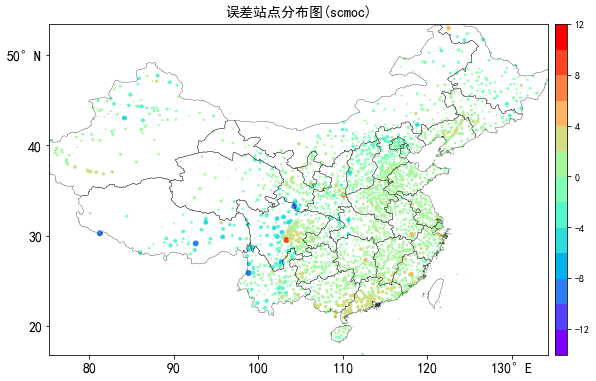

误差绝对值前1的站点：
id:56228   lon:96.92  lat:30.05 value:-13.566743


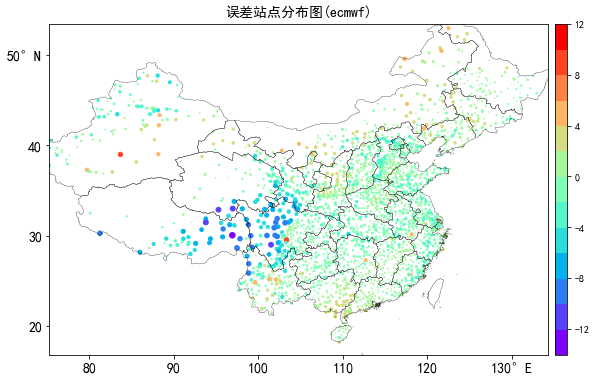

误差绝对值前1的站点：
id:56263   lon:101.88  lat:30.88 value:-13.893854


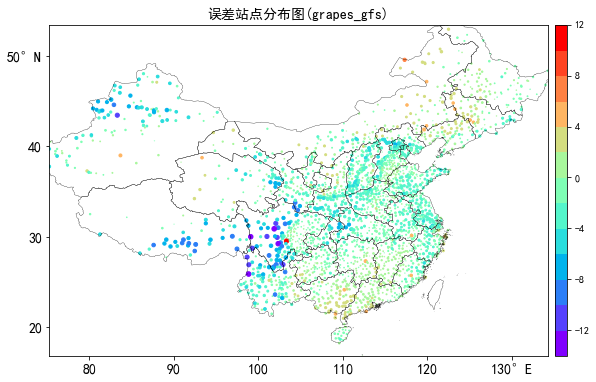

In [13]:
mpd.me_scatter(tmin_all)

AttributeError: module 'meteva.product' has no attribute 'time_list_line_error'

In [18]:
tmin_all.to_hdf(r"H:\tmin.h5",'df')

In [19]:
tmax_all.to_hdf(r"H:\tmax.h5",'df')

误差绝对值前1的站点：
id:56385   lon:103.33  lat:29.52 value:10.572707


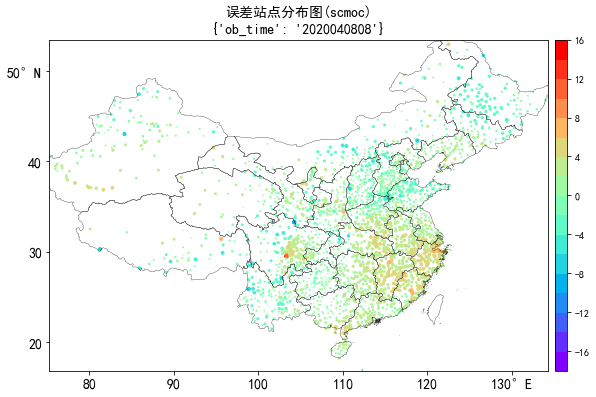

误差绝对值前1的站点：
id:56228   lon:96.92  lat:30.05 value:-16.150608


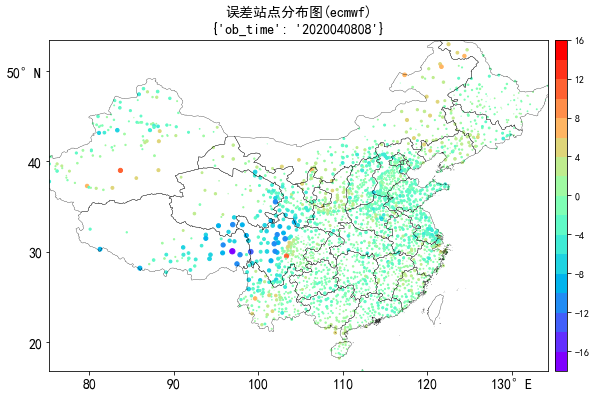

误差绝对值前1的站点：
id:56263   lon:101.88  lat:30.88 value:-14.148216


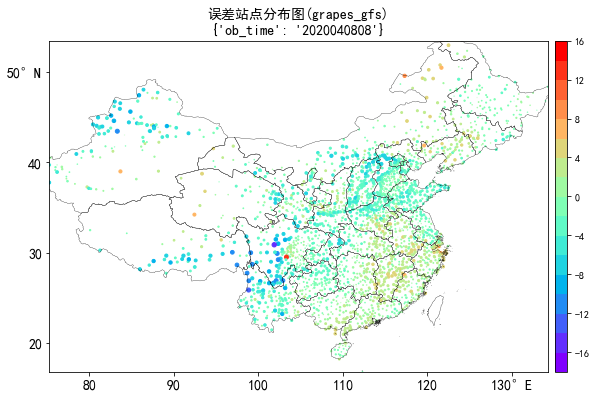

In [21]:
mpd.me_scatter(tmin_all,s = {"ob_time":"2020040808"})